In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('../data/transaction/transaction_appended.csv')
data.head(20)
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281003 entries, 0 to 281002
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      281003 non-null  int64  
 1   본번              280958 non-null  float64
 2   부번              280958 non-null  float64
 3   addr            280853 non-null  object 
 4   load_addr       281003 non-null  object 
 5   dong            281003 non-null  object 
 6   bunji           280853 non-null  object 
 7   floor           281003 non-null  int64  
 8   brand           281003 non-null  object 
 9   build_area      281003 non-null  float64
 10  price           281003 non-null  int64  
 11  contract_year   281003 non-null  int64  
 12  contract_month  281003 non-null  int64  
 13  contract_day    281003 non-null  int64  
 14  year_built      281003 non-null  int64  
 15  years_use       281003 non-null  int64  
 16  load_name       281003 non-null  object 
dtypes: float64

In [4]:
data.isnull().sum()

Unnamed: 0          0
본번                 45
부번                 45
addr              150
load_addr           0
dong                0
bunji             150
floor               0
brand               0
build_area          0
price               0
contract_year       0
contract_month      0
contract_day        0
year_built          0
years_use           0
load_name           0
dtype: int64

In [7]:
# 주소에서 구만 추출 후 gu컬럼 생성

data['gu'] = data['load_addr'].str.extract('([가-힣]+구)')
data

,Unnamed: 0,본번,부번,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name,gu
0,0,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3,강남구
1,1,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3,강남구
2,2,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3,강남구
3,3,652.0,0.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307,강남구
4,4,12.0,2.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280998,27505,450.0,0.0,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,14,한신2,59.76,660000000,2021,3,18,1998,24,동일로 752,중랑구
280999,27506,450.0,0.0,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,6,한신2,59.76,660000000,2021,4,10,1998,24,동일로 752,중랑구
281000,27507,450.0,0.0,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,13,한신2,59.76,680000000,2021,4,16,1998,24,동일로 752,중랑구
281001,27508,274.0,51.0,서울특별시 중랑구 중화동 274-51,서울특별시 중랑구 동일로144길 74,서울특별시 중랑구 중화동,274-51,5,한영(101),57.66,300000000,2021,2,27,2003,19,동일로144길 74,중랑구


In [8]:
# 60이하 : 소형, 61~85 : 중형, 86~134 : 대형, 135이상 : 초대형 으로 구분하는 grade컬럼 생성

data['build_area_grade'] = pd.cut(x=data['build_area'], 
                                  bins=[data['build_area'].min(),60,85,134,data['build_area'].max()],
                                  labels=['소형', '중형','대형','초대형'])
data

,Unnamed: 0,본번,부번,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name,gu,build_area_grade
0,0,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3,강남구,중형
1,1,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3,강남구,중형
2,2,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3,강남구,중형
3,3,652.0,0.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307,강남구,초대형
4,4,12.0,2.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69,강남구,초대형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280998,27505,450.0,0.0,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,14,한신2,59.76,660000000,2021,3,18,1998,24,동일로 752,중랑구,소형
280999,27506,450.0,0.0,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,6,한신2,59.76,660000000,2021,4,10,1998,24,동일로 752,중랑구,소형
281000,27507,450.0,0.0,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,13,한신2,59.76,680000000,2021,4,16,1998,24,동일로 752,중랑구,소형
281001,27508,274.0,51.0,서울특별시 중랑구 중화동 274-51,서울특별시 중랑구 동일로144길 74,서울특별시 중랑구 중화동,274-51,5,한영(101),57.66,300000000,2021,2,27,2003,19,동일로144길 74,중랑구,소형


In [9]:
data["floor_cat"] = pd.cut(data["floor"], bins=[-3,3,7,12,20,70],labels=["지하~3층","4~7층","8~12층","13~20층","20층 이상"])
data.head()

,Unnamed: 0,본번,부번,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name,gu,build_area_grade,floor_cat
0,0,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3,강남구,중형,4~7층
1,1,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3,강남구,중형,지하~3층
2,2,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3,강남구,중형,지하~3층
3,3,652.0,0.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307,강남구,초대형,8~12층
4,4,12.0,2.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69,강남구,초대형,13~20층


In [10]:
# 필요없는 컬럼 제거 

data_edit = data.drop(['본번','부번','brand','bunji'],axis=1)
data_edit

,Unnamed: 0,addr,load_addr,dong,floor,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name,gu,build_area_grade,floor_cat
0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,4,79.97,1300000000,2018,1,3,1987,35,언주로 3,강남구,중형,4~7층
1,1,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,2,79.97,1170000000,2018,1,8,1987,35,언주로 3,강남구,중형,지하~3층
2,2,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,1,79.97,1300000000,2018,1,11,1987,35,언주로 3,강남구,중형,지하~3층
3,3,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,12,161.00,2100000000,2018,1,10,1984,38,개포로 307,강남구,초대형,8~12층
4,4,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,16,170.32,1620000000,2018,1,2,2004,18,개포로109길 69,강남구,초대형,13~20층
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280998,27505,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,14,59.76,660000000,2021,3,18,1998,24,동일로 752,중랑구,소형,13~20층
280999,27506,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,6,59.76,660000000,2021,4,10,1998,24,동일로 752,중랑구,소형,4~7층
281000,27507,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,13,59.76,680000000,2021,4,16,1998,24,동일로 752,중랑구,소형,13~20층
281001,27508,서울특별시 중랑구 중화동 274-51,서울특별시 중랑구 동일로144길 74,서울특별시 중랑구 중화동,5,57.66,300000000,2021,2,27,2003,19,동일로144길 74,중랑구,소형,4~7층


In [12]:

columns = ['load_name','contract_year','contract_month']
data_edit.groupby(columns).mean()

Unnamed: 0      floor  build_area  \
load_name contract_year contract_month                                      
          2018          2                  77481.0   8.000000     84.9774   
                        3                  77481.0  14.000000     78.9837   
                        4                  77483.0   3.000000     71.9832   
                        7                  54118.0   2.000000     59.9900   
                        8                  68681.0  16.333333     84.9800   
...                                            ...        ...         ...   
희우정로1길 48 2019          11                 41373.0   3.000000     84.2600   
                        12                 41374.0   6.000000     84.2600   
          2020          2                  49369.0   2.000000     81.3000   
희우정로21길 5 2019          1                  39365.0   5.000000     73.5300   
          2020          7                  47474.0   2.000000     84.1200   

                                               price  contract_day  \
load_name contract_year contract_month                               
          2018          2               9.000000e+08          22.0   
                        3               8.950000e+08          25.0   
                        4               9.000000e+08          28.0   
                        7               7.400000e+08          15.0   
                        8               1.083333e+09          19.0   
...                                              ...           ...   
희우정로1길 48 2019          11              6.200000e+08          16.0   
                        12              6.400000e+08           3.0   
          2020          2               6.000000e+08          28.0   
희우정로21길 5 2019          1               4.400000e+08          26.0   
          2020          7               5.900000e+08           7.0   

                                        year_built  years_use  
load_name contract_year contract_month                         
          2018          2                   2018.0        4.0  
                        3                   2017.5        4.5  
                        4                   2018.0        4.0  
                        7                   2017.0        5.0  
                        8                   2017.0        5.0  
...                                            ...        ...  
희우정로1길 48 2019          11                  2005.0       17.0  
                        12                  2005.0       17.0  
          2020          2                   2005.0       17.0  
희우정로21길 5 2019          1                   2005.0       17.0  
          2020          7                   2005.0       17.0  

[97877 rows x 7 columns]

In [37]:
cnt = 0
storage = pd.DataFrame()

for i in addr_load_name_l:
    for j in range(len(data_edit)):
        if data_edit.loc[j,'load_name'] in i:
            storage.append(data_edit.loc[j,:])
    
    #for k in range(len(strage))
storage

KeyboardInterrupt: 

In [13]:
len(data_edit['load_name'])

281003

In [183]:
data_edit_dup = pd.DataFrame()
type(data_edit_dup)

pandas.core.frame.DataFrame

In [184]:
#storage = []
data_edit_dup.append(data_edit)
data_edit_dup

""


gu   contract_year
강남구  2018             7.943259e+08
     2019             5.237284e+08
     2020             4.184800e+08
     2021             3.155153e+08
강동구  2018             6.479718e+08
                          ...     
중구   2021             8.117202e+08
중랑구  2018             3.890610e+08
     2019             4.413690e+08
     2020             5.062599e+08
     2021             6.238378e+08
Name: price, Length: 100, dtype: float64

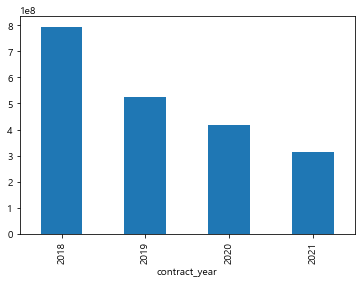

In [14]:
# 구별, 연도 별로 매매가격 평균

data_edit.groupby(['gu','contract_year'])['price'].mean()['강남구'].plot.bar()
data_edit.groupby(['gu','contract_year'])['price'].mean()

In [15]:
data_edit.groupby('gu').mean()
sns.pairplot(data_edit['gu']['강남구'], vars=['price','build_area','floor'])

KeyError: '강남구'

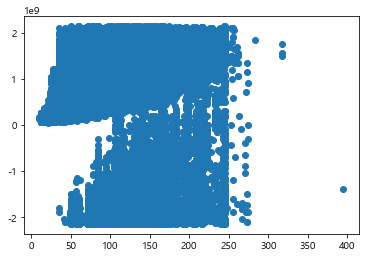

In [200]:
plt.scatter('build_area','price',data=data)

<AxesSubplot:xlabel='build_area_grade'>

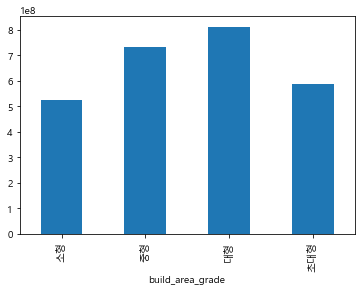

In [16]:
grade_price = data.groupby('build_area_grade')['price'].mean()
grade_price.plot.bar()

<AxesSubplot:xlabel='gu'>

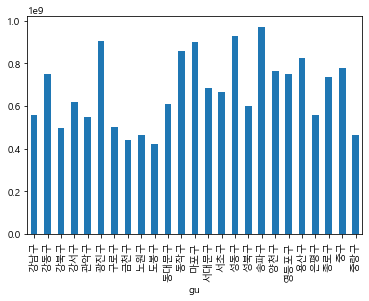

In [12]:
gu_price = data.groupby('gu')['price'].mean()
gu_price.plot.bar()

<AxesSubplot:xlabel='build_area_grade'>

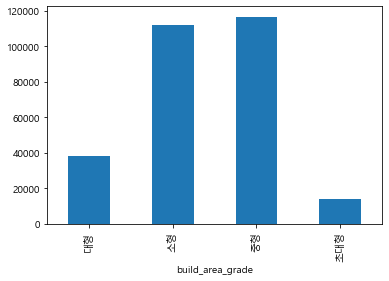

In [13]:
area_grade_count = data.groupby('build_area_grade')['price'].count()
area_grade_count.plot.bar()

In [203]:
sns.pairplot(data_edit['gu']['강남구'], vars=['price','build_area','floor'])

KeyError: '강남구'

In [17]:
# 카카오 api인포트

import requests

header = {'Authorization':'KakaoAK e57b23a69aeee976f416848e9d4d2c6d'}
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format('서울특별시 강남구 봉은사로29길 26')


requests.get(url,headers=header).json()

{'documents': [{'address_name': '서울 강남구 논현동 229-13',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '부동산 > 주거시설 > 아파트',
   'distance': '',
   'id': '20846630',
   'phone': '',
   'place_name': '이움아파트',
   'place_url': 'http://place.map.kakao.com/20846630',
   'road_address_name': '서울 강남구 봉은사로29길 26',
   'x': '127.03411656303464',
   'y': '37.50925269224573'}],
 'meta': {'is_end': True,
  'pageable_count': 1,
  'same_name': {'keyword': '',
   'region': [],
   'selected_region': '서울 강남구 봉은사로29길'},
  'total_count': 1}}

In [15]:
data['brand'].str.extract('([0-9]+[가-힣]+오피스텔)').sum()

0    0
dtype: object

In [23]:
'''
# 도로명 주소 리스트화
data_addr =[]

for i in data['load_addr']:
    data_addr.append(i)
    
data_addr
'''

# 도로명주소 값만 뽑아 변수에 저장(중복 제거)
# API뽑을때 중복되는 작업을 줄이기 위해 필요한 작업

# value_counts() 사용
addr_load_name_l = list(data_edit['load_addr'].value_counts().index)
print(len(addr_load_name_l))

# groupby 사용
print(len(list(data_edit.groupby('load_addr')['price'].sum().index)))

addr_load_name_l

8282
8282


['서울특별시 강북구 솔샘로 174',
 '서울특별시 송파구 올림픽로 435',
 '서울특별시 성북구 성북로4길 52',
 '서울특별시 서대문구 가재울미래로 2',
 '서울특별시 관악구 성현로 80',
 '서울특별시 금천구 금하로 816',
 '서울특별시 송파구 올림픽로 135',
 '서울특별시 강동구 아리수로50길 50',
 '서울특별시 송파구 올림픽로 99',
 '서울특별시 강동구 상암로 11',
 '서울특별시 도봉구 마들로 859-19',
 '서울특별시 송파구 중대로 24',
 '서울특별시 마포구 마포대로 195',
 '서울특별시 강동구 고덕로 131',
 '서울특별시 중구 다산로 32',
 '서울특별시 송파구 양재대로 1218',
 '서울특별시 노원구 중계로 230',
 '서울특별시 서대문구 수색로 100',
 '서울특별시 관악구 관악로30길 27',
 '서울특별시 노원구 노원로 532',
 '서울특별시 도봉구 덕릉로66길 17',
 '서울특별시 노원구 공릉로34길 62',
 '서울특별시 강동구 고덕로 210',
 '서울특별시 성북구 오패산로 46',
 '서울특별시 노원구 마들로 31',
 '서울특별시 관악구 난곡로 55',
 '서울특별시 강남구 삼성로 212',
 '서울특별시 양천구 신월로 99',
 '서울특별시 성동구 행당로 82',
 '서울특별시 관악구 은천로 93',
 '서울특별시 강서구 우현로 67',
 '서울특별시 중구 청계천로 400',
 '서울특별시 노원구 동일로227길 86',
 '서울특별시 송파구 송파대로 567',
 '서울특별시 노원구 섬밭로 196',
 '서울특별시 구로구 개봉로20길 6',
 '서울특별시 노원구 초안산로1길 18',
 '서울특별시 노원구 노해로 508',
 '서울특별시 서초구 신반포로 270',
 '서울특별시 송파구 동남로 193',
 '서울특별시 동대문구 한천로 248',
 '서울특별시 구로구 신도림로 16',
 '서울특별시 노원구 섬밭로 229',
 '서울특별시 중랑구 신내로19길 42',
 '서울특별시 성동구

In [42]:
# 리스트데이터를 데이터 프레임으로 변환
# 위도, 경도, 브랜드명을 받기 위해서 필요하다.

#addr_load_name = pd.DataFrame(addr_load_name_l, columns=['addr_load'])
addr_load_name_backup = addr_load_name
addr_load_name.to_csv('data/api_data_transaction')

In [46]:
addr_load_name

,brand_name,addr_lat,addr_lng
0,SK북한산시티아파트,37.6184432414034,127.013039501497
1,파크리오아파트,37.52122940631966,127.10998251166994
2,한신한진아파트,37.59480874606793,127.0103177857626
3,DMC파크뷰자이3단지아파트,37.57333642647875,126.92100761825604
4,관악드림타운아파트,37.49020798172745,126.95024706445757
...,...,...,...
6399,신호파크뷰아파트,37.52751808942945,127.12133992359011
6400,지오빌아파트,37.55499667896548,126.87010948357204
6401,삼영N-CITY아파트,37.601038867229946,126.92598478262798
6402,월드메르시안아파트,37.57964463113995,126.90441456594527


In [40]:
addr_load_name_backup = pd.DataFrame()

In [32]:
print(addr_load_name.isnull().sum())
print('-----------------------------')
print(len(addr_load_name))
addr_load_name.isnull

addr_load        0
brand_name    1749
addr_lat      1749
addr_lng      1749
dtype: int64
-----------------------------
8282


<bound method DataFrame.isnull of                      addr_load         brand_name            addr_lat  \
0            서울특별시 강북구 솔샘로 174         SK북한산시티아파트    37.6184432414034   
1           서울특별시 송파구 올림픽로 435            파크리오아파트   37.52122940631966   
2           서울특별시 성북구 성북로4길 52            한신한진아파트   37.59480874606793   
3          서울특별시 서대문구 가재울미래로 2     DMC파크뷰자이3단지아파트   37.57333642647875   
4             서울특별시 관악구 성현로 80          관악드림타운아파트   37.49020798172745   
...                        ...                ...                 ...   
8277       서울특별시 광진구 자양로 207-1  광남캐스빌아파트(620-6번지)   37.54598380851891   
8278  서울특별시 강동구 구천면로47가길 14-36             해가든아파트  37.550087024340456   
8279      서울특별시 은평구 응암로21가길 25             월드빌아파트   37.59600963650668   
8280       서울특별시 종로구 창신7길 17-3              미니아파트    37.5757257765415   
8281        서울특별시 성북구 월곡로7길 45          해가온팰리스아파트    37.5989145917185   

                addr_lng  
0       127.013039501497  
1     127.10998251166994  
2      1

In [45]:
# 카카오 API를 이용하여, 위도, 경도, 아파트명,주소명을 추출
# 같은 주소에 상가가 포함된 경우 아파트값만 골라서 추출

cnt_err = 0
cnt = 0

def API(addr_load_name_l):
    
    global cnt_err
    global cnt
    
    for addr in addr_load_name_l:
        try:
            url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(addr)
            for i in range(len(requests.get(url,headers=header).json()['documents'])):
            
                if requests.get(url,headers=header).json()['documents'][i]['category_name'] in ['부동산 > 주거시설 > 아파트'] :
                    place = requests.get(url,headers=header).json()['documents'][i]
    
                    addr_load_name.loc[cnt,'brand_name'] = place['place_name']
                    addr_load_name.loc[cnt,'addr_lat'] = place['y']
                    addr_load_name.loc[cnt,'addr_lng'] = place['x']
    
                    print(addr+'-------------->' + place.get('place_name'))
    
        # 주소가 형식에 맞지않아 발생하는 에러를 예외처리
        except IndexError:
            cnt_err += 1
                
    
        # 혹시몰라 만들어둠
        finally:
            cnt += 1
            pass
    print('에러 발생 :{} 회'.fromat(cnt_err))
API(addr_load_name_l)


서울특별시 강북구 솔샘로 174-------------->SK북한산시티아파트
서울특별시 송파구 올림픽로 435-------------->파크리오아파트
서울특별시 성북구 성북로4길 52-------------->한신한진아파트
서울특별시 서대문구 가재울미래로 2-------------->DMC파크뷰자이1단지아파트
서울특별시 서대문구 가재울미래로 2-------------->DMC파크뷰자이2단지아파트
서울특별시 서대문구 가재울미래로 2-------------->DMC파크뷰자이3단지아파트
서울특별시 관악구 성현로 80-------------->관악드림타운아파트
서울특별시 금천구 금하로 816-------------->벽산5단지아파트
서울특별시 송파구 올림픽로 135-------------->리센츠아파트
서울특별시 강동구 아리수로50길 50-------------->고덕래미안힐스테이트아파트
서울특별시 송파구 올림픽로 99-------------->잠실엘스아파트
서울특별시 강동구 상암로 11-------------->선사현대아파트
서울특별시 도봉구 마들로 859-19-------------->도봉한신아파트
서울특별시 송파구 중대로 24-------------->올림픽훼밀리타운아파트
서울특별시 마포구 마포대로 195-------------->마포래미안푸르지오아파트
서울특별시 강동구 고덕로 131-------------->강동롯데캐슬퍼스트아파트
서울특별시 중구 다산로 32-------------->남산타운아파트
서울특별시 송파구 양재대로 1218-------------->올림픽선수기자촌아파트
서울특별시 노원구 중계로 230-------------->중계주공5단지아파트
서울특별시 서대문구 수색로 100-------------->DMC래미안e편한세상아파트
서울특별시 관악구 관악로30길 27-------------->관악푸르지오아파트
서울특별시 노원구 노원로 532-------------->상계주공9단지아파트
서울특별시 도봉구 덕릉로66길 17-------------->주공17단

서울특별시 노원구 석계로 49-------------->현대아파트
서울특별시 관악구 봉천로 387-------------->봉천두산1,2단지아파트
서울특별시 중구 청구로1길 23-------------->신당동삼성아파트
서울특별시 양천구 목동동로 10-------------->목동신시가지11단지아파트
서울특별시 마포구 새창로 52-------------->도화현대1차아파트
서울특별시 마포구 새창로 52-------------->도화현대아파트
서울특별시 영등포구 양평로24길 9-------------->양평한신아파트
서울특별시 은평구 통일로 780-------------->미성아파트
서울특별시 동작구 장승배기로4길 9-------------->상도더샵1차아파트
서울특별시 구로구 개봉로20길 158-------------->현대홈타운2단지아파트
서울특별시 용산구 새창로 70-------------->도원삼성래미안아파트
서울특별시 금천구 벚꽃로 40-------------->금천롯데캐슬골드파크1차아파트
서울특별시 금천구 한내로 69-54-------------->주공14단지아파트
서울특별시 강서구 공항대로 382-------------->우장산롯데캐슬아파트
서울특별시 도봉구 마들로 616-------------->대상타운현대아파트
서울특별시 양천구 목동서로 340-------------->목동신시가지9단지아파트
서울특별시 도봉구 노해로66길 21-------------->창동삼성래미안아파트
서울특별시 서대문구 독립문공원길 17-------------->독립문극동아파트(201)
서울특별시 성동구 고산자로 160-------------->대림강변타운아파트
서울특별시 서대문구 독립문로8길 54-------------->천연뜨란채아파트
서울특별시 서초구 서초중앙로 200-------------->삼풍아파트
서울특별시 양천구 목동로 212-------------->목동신시가지7단지아파트
서울특별시 서대문구 통일로25길 30-------------->홍제한양아파트
서울특별시 

서울특별시 영등포구 버드나루로 130-------------->강변래미안아파트
서울특별시 노원구 덕릉로76길 29-------------->중계주공4단지아파트
서울특별시 성북구 길음로 74-------------->길음뉴타운5단지래미안아파트
서울특별시 서초구 고무래로 35-------------->반포리체아파트
서울특별시 강남구 언주로30길 57-------------->타워팰리스2차아파트
서울특별시 강남구 자곡로 101-------------->래미안강남힐즈아파트
서울특별시 은평구 통일로 796-------------->북한산힐스테이트7차아파트
서울특별시 강서구 화곡로63가길 71-------------->등촌주공10단지아파트
서울특별시 강서구 양천로55길 55-------------->강서한강자이아파트
서울특별시 금천구 금하로 750-------------->관악우방아파트
서울특별시 관악구 신림로3길 40-------------->건영3차아파트
서울특별시 성북구 화랑로 214-------------->래미안석관아파트
서울특별시 동작구 사당로2가길 102-------------->사당자이아파트
서울특별시 광진구 아차산로 552-------------->광장극동2차아파트
서울특별시 광진구 아차산로 552-------------->광장극동1차아파트
서울특별시 동대문구 한천로11길 10-1-------------->동아아파트
서울특별시 동대문구 정릉천동로 36-------------->래미안허브리츠아파트
서울특별시 성동구 독서당로 441-------------->신동아아파트
서울특별시 송파구 오금로35길 17-------------->현대아파트
서울특별시 송파구 충민로 152-------------->송파파인타운3단지아파트
서울특별시 성북구 아리랑로 89-------------->돈암일신건영휴먼빌아파트
서울특별시 노원구 마들로3길 37-------------->성원4단지아파트
서울특별시 강남구 자곡로 21-------------->세곡푸르지오아파트
서울특별시 중랑

서울특별시 동대문구 한천로58길 107-------------->이문현대아파트
서울특별시 노원구 중계로 195-------------->동진신안아파트
서울특별시 강동구 상암로3길 77-------------->삼성광나루아파트
서울특별시 동작구 상도로 320-------------->상도중앙하이츠빌아파트
서울특별시 구로구 경인로8길 64-------------->영풍마드레빌아파트
서울특별시 노원구 덕릉로71길 5-------------->성원아파트
서울특별시 용산구 원효로 216-------------->용산e편한세상아파트
서울특별시 성북구 정릉로 402-16-------------->범양아파트
서울특별시 양천구 신정로 170-------------->신정현대6차아파트
서울특별시 서대문구 북아현로1가길 20-------------->e편한세상신촌아파트
서울특별시 중랑구 망우로75길 19-------------->중랑숲리가아파트
서울특별시 강서구 공항대로39길 100-------------->등촌대림아파트
서울특별시 영등포구 문래로4길 6-------------->현대2차아파트
서울특별시 서대문구 세검정로 134-------------->유원하나아파트
서울특별시 동작구 상도로31길 19-------------->상도브라운스톤아파트
서울특별시 동대문구 한천로 300-------------->동일스위트리버아파트
서울특별시 송파구 올림픽로4길 15-------------->아시아선수촌아파트
서울특별시 구로구 남부순환로97길 30-------------->임괄아파트
서울특별시 동대문구 장한로14길 81-------------->장안래미안1차아파트
서울특별시 성북구 아리랑로19길 60-------------->정릉중앙하이츠빌1단지아파트
서울특별시 성북구 종암로21길 127-------------->종암아이파크1차아파트
서울특별시 성북구 한천로 509-------------->코오롱아파트
서울특별시 구로구 도림로22길 8-------------->이화우성아파트
서울특별시 은

서울특별시 도봉구 방학로 212-11-------------->대원그린아파트
서울특별시 마포구 토정로 167-------------->서강해모로아파트
서울특별시 동대문구 장안벚꽃로5길 19-------------->휘경베스트빌현대아파트
서울특별시 서초구 바우뫼로 91-------------->우성아파트
서울특별시 중랑구 봉화산로48길 62-------------->건영1차아파트
서울특별시 동작구 사당로27길 190-------------->사당롯데캐슬1차아파트
서울특별시 강서구 방화대로45길 32-------------->방화동부센트레빌2차아파트
서울특별시 성북구 낙산길 243-15-------------->삼선현대힐스테이트아파트
서울특별시 영등포구 가마산로 312-------------->신동아아파트
서울특별시 노원구 동일로198가길 149-------------->공릉2단지라이프아파트
서울특별시 성동구 성수일로8길 47-------------->성수롯데캐슬파크아파트
서울특별시 성북구 동소문로15길 99-------------->동소문한신휴플러스2차아파트
서울특별시 양천구 목동중앙로 11-------------->대원칸타빌2단지아파트
서울특별시 서대문구 증가로 150-------------->DMC센트럴아이파크아파트
서울특별시 중랑구 공릉로18길 59-------------->태릉브라운스톤아파트
서울특별시 중구 다산로36길 110-------------->신당푸르지오아파트
서울특별시 강남구 학동로 408-------------->삼성월드타워아파트
서울특별시 강동구 고덕로27길 36-------------->강동현대홈타운아파트
서울특별시 동작구 사당로17길 111-------------->현대아파트
서울특별시 종로구 동망산길 47-------------->종로센트레빌아파트
서울특별시 송파구 송이로 88-------------->가락대림아파트
서울특별시 성동구 독서당로 343-------------->금호삼성래미안아파트
서울특별시 동작구 노량진로32길 156--

서울특별시 송파구 올림픽로35가길 10-------------->잠실더샵스타파크아파트
서울특별시 도봉구 노해로70길 12-------------->동아아파트
서울특별시 성동구 마장로 271-------------->마장동삼성아파트
서울특별시 마포구 토정로31길 23-------------->래미안마포리버웰아파트
서울특별시 영등포구 당산로36길 12-------------->당산삼성2차아파트
서울특별시 구로구 경인로40길 11-------------->영화아파트
서울특별시 중구 서소문로9길 28-------------->덕수궁롯데캐슬아파트
서울특별시 서대문구 응암로 133-------------->대경아르체아파트
서울특별시 강서구 양천로 656-------------->관음삼성아파트
서울특별시 성북구 보국문로 19-------------->정릉푸르지오아파트
서울특별시 노원구 노원로1가길 10-------------->공릉8단지청솔아파트
서울특별시 강동구 천호대로 1095-------------->천호현대아이파크아파트
서울특별시 용산구 한남대로 60-------------->한남리첸시아아파트
서울특별시 서초구 서초대로 17-------------->방배대우디오빌아파트
서울특별시 서초구 잠원로 150-------------->잠원한신아파트
서울특별시 영등포구 가마산로 575-------------->한성아파트
서울특별시 성동구 왕십리로 36-------------->강변건영아파트
서울특별시 강남구 학동로 165-------------->마일스디오빌아파트
서울특별시 양천구 신목로 7-------------->목동삼성아파트
서울특별시 서초구 서초대로74길 30-------------->우성5차아파트
서울특별시 강동구 아리수로97길 19-------------->강일리버파크4단지아파트
서울특별시 강동구 천호대로168길 25-------------->코오롱1차아파트
서울특별시 중구 퇴계로 72-------------->SK리더스뷰남산아파트
서울특별시 영등포구 도림로 313

서울특별시 마포구 독막로20나길 22-------------->래미안밤섬리베뉴I아파트
서울특별시 강남구 압구정로 309-------------->현대8차아파트
서울특별시 성북구 종암로24길 35-------------->종암SK뷰2차아파트
서울특별시 강남구 도곡로 320-------------->래미안도곡카운티아파트
서울특별시 영등포구 신길로 108-------------->남서울아파트
서울특별시 구로구 구일로10길 53-------------->현대아파트
서울특별시 영등포구 국제금융로7길 20-------------->대교아파트
서울특별시 강서구 양천로27길 129-------------->마곡서광아파트
서울특별시 동대문구 서울시립대로 5-------------->신답극동아파트
서울특별시 강남구 남부순환로363길 30-------------->도곡쌍용예가아파트
서울특별시 마포구 신수로 107-------------->신촌삼익아파트
서울특별시 송파구 성내천로 6-------------->송파레미니스1단지아파트
서울특별시 서대문구 모래내로 411-------------->홍제금호어울림아파트
서울특별시 송파구 양재대로 1109-------------->대림아파트
서울특별시 용산구 백범로90길 90-------------->용산KCC웰츠타워아파트
서울특별시 양천구 목동중앙북로8길 71-------------->목동롯데캐슬마에스트로아파트
서울특별시 은평구 백련산로 160-------------->녹번역센트레빌아파트
서울특별시 서초구 서초대로 385-------------->진흥아파트
서울특별시 서초구 헌릉로8길 22-------------->서초포레스타3단지아파트
서울특별시 광진구 뚝섬로52마길 56-------------->로얄동아아파트
서울특별시 강서구 양천로77길 45-------------->염창무학아파트
서울특별시 마포구 마포대로4라길 30-------------->마포쌍용황금아파트
서울특별시 동대문구 한천로58길 139-------------->이문1차푸르

서울특별시 중랑구 용마산로125길 92-------------->석탑아파트
서울특별시 양천구 월정로9길 20-------------->양천벽산블루밍2단지아파트
서울특별시 강동구 아리수로94길 19-------------->강일리버파크6단지아파트
서울특별시 동작구 사당로27길 181-------------->사당롯데캐슬2차아파트
서울특별시 광진구 동일로24길 5-------------->화양현대아파트
서울특별시 용산구 이촌로 193-------------->이촌우성아파트
서울특별시 광진구 구의강변로 94-------------->현대6단지아파트
서울특별시 은평구 갈현로23길 41-------------->한솔아파트
서울특별시 동작구 여의대방로44길 9-------------->성원아파트
서울특별시 강서구 우현로 26-------------->우장산SK뷰아파트
서울특별시 종로구 통일로18길 34-------------->인왕산2차아이파크아파트
서울특별시 서초구 사평대로 240-------------->반포미도2차아파트
서울특별시 성북구 동소문로 284-------------->길음서희스타힐스아파트
서울특별시 서초구 잠원로14길 23-------------->잠원롯데캐슬갤럭시2차아파트
서울특별시 서초구 잠원로 213-10-------------->한강아파트
서울특별시 강서구 마곡서1로 111-11-------------->마곡엠밸리5단지아파트
서울특별시 강남구 개포로 311-------------->우성9차아파트
서울특별시 송파구 올림픽로35길 93-------------->더샵스타리버아파트
서울특별시 은평구 통일로 630-------------->래미안베라힐즈아파트
서울특별시 노원구 우이천로2나길 14-------------->월계흥화브라운빌아파트
서울특별시 은평구 수색로 217-------------->DMC자이1단지아파트
서울특별시 금천구 시흥대로51길 55-------------->성지아파트
서울특별시 영등포구 영신로 193-------------->한양아파

서울특별시 노원구 덕릉로60길 222-------------->초안산쌍용스윗닷홈아파트
서울특별시 은평구 가좌로 334-------------->응암역효성해링턴플레이스아파트
서울특별시 강남구 학동로 609-------------->청담삼익아파트
서울특별시 강남구 학동로 609-------------->청담삼익롯데캐슬아파트 (예정)
서울특별시 강동구 성안로 155-------------->강동역두산위브센티움아파트
서울특별시 용산구 삼개로 60-------------->청암천년명가자이아파트
서울특별시 구로구 천왕로 91-------------->천왕이펜하우스1단지아파트
서울특별시 동대문구 외대역동로 14-------------->휘경센트레빌아파트
서울특별시 송파구 백제고분로 497-------------->효성올림픽카운티아파트
서울특별시 송파구 한가람로 468-------------->신성노바빌아파트
서울특별시 강남구 학동로 432-------------->삼성동롯데아파트
서울특별시 금천구 벚꽃로6길 3-------------->금천이랜드해가든아파트
서울특별시 강남구 일원로 127-------------->가람아파트
서울특별시 동작구 상도로 207-------------->상도효성해링턴플레이스아파트
서울특별시 성동구 행당로 99-------------->행당브라운스톤아파트
서울특별시 동작구 서달로 83-------------->우리유앤미아파트
서울특별시 송파구 성내천로 314-------------->마천금호어울림2차아파트
서울특별시 강동구 풍성로 196-------------->둔촌역청구아파트
서울특별시 양천구 오목로 354-------------->목동센트럴푸르지오아파트
서울특별시 동대문구 홍릉로10길 48-------------->홍릉동부아파트
서울특별시 강서구 곰달래로18길 3-------------->남광아파트
서울특별시 양천구 신월로20길 33-------------->신도신월1차아파트
서울특별시 서초구 태봉로2길 30-------------->서초네이처

서울특별시 강서구 남부순환로 11-------------->강서센트레빌4차아파트
서울특별시 용산구 이촌로88길 30-------------->이촌삼성리버스위트아파트
서울특별시 강동구 천호대로198길 36-------------->둔촌한솔솔파크아파트
서울특별시 관악구 신림로 194-------------->앰팰리스아파트
서울특별시 관악구 은천로5길 39-------------->복권아파트
서울특별시 강서구 등촌로53길 39-------------->태진아름아파트
서울특별시 도봉구 해등로 139-------------->미소애아파트
서울특별시 노원구 공릉로34길 45-------------->화랑해링턴플레이스아파트
서울특별시 은평구 가좌로7나길 35-------------->경남아파트
서울특별시 강남구 학동로68길 30-------------->삼성동중앙하이츠빌리지아파트
서울특별시 용산구 이촌로88길 15-------------->왕궁아파트
서울특별시 용산구 이촌로88길 15-------------->왕궁재건축아파트 (예정)
서울특별시 영등포구 선유로47길 34-------------->삼호한숲아파트
서울특별시 구로구 경인로 248-14-------------->동부1차아파트
서울특별시 동작구 보라매로5가길 16-------------->보라매아카데미타워아파트
서울특별시 양천구 목동중앙본로 10-------------->극동늘푸른아파트
서울특별시 송파구 거마로9길 19-------------->삼호아파트
서울특별시 강남구 언주로 123-------------->개포한신아파트
서울특별시 서초구 신반포로15길 4-------------->반포푸르지오아파트
서울특별시 강동구 진황도로 211-------------->현대3차아파트
서울특별시 강서구 등촌로 137-------------->등촌e편한세상아파트
서울특별시 중구 마른내로 72-------------->신성상가아파트
서울특별시 영등포구 양평로30길 51-------------->한솔아파트
서울특별시 광진구 뚝섬로

서울특별시 강북구 삼양로24길 19-------------->현대성우아파트
서울특별시 광진구 자양번영로3길 65-------------->자양삼성아파트
서울특별시 영등포구 당산로42길 7-------------->당산효성타운2차아파트
서울특별시 노원구 한글비석로 383-------------->삼창타워프라자아파트
서울특별시 강서구 등촌로 113-------------->그린임광아파트
서울특별시 관악구 인헌12길 46-2-------------->은천1단지아파트
서울특별시 은평구 녹번로 40-------------->현대아파트
서울특별시 동대문구 천장산로11길 22-------------->이문삼성래미안1차아파트
서울특별시 마포구 백범로 239-------------->신공덕e편한세상아파트
서울특별시 동대문구 신이문로 9-------------->신이문금호어울림아파트
서울특별시 도봉구 마들로 770-------------->서광아파트
서울특별시 마포구 독막로 288-------------->대흥세양아파트
서울특별시 중랑구 숙선옹주로9길 25-------------->세방아파트
서울특별시 동작구 여의대방로10길 13-------------->한성아파트
서울특별시 서초구 태봉로2길 10-------------->서초네이처힐7단지아파트
서울특별시 광진구 뚝섬로33길 20-------------->자양한라아파트
서울특별시 용산구 장문로 141-------------->한남힐스테이트아파트
서울특별시 양천구 월정로 21-------------->해태아파트
서울특별시 영등포구 선유서로 6-------------->문래현대3차아파트
서울특별시 관악구 미성5길 33-------------->한양아파트
서울특별시 구로구 새말로 25-------------->구로SK뷰아파트
서울특별시 광진구 아차산로69길 29-------------->광장현대홈타운11차
서울특별시 강서구 강서로17라길 3-------------->복지
서울특별시 강서구 강서로46길 79-------------->

서울특별시 종로구 송월길 155-------------->경희궁자이4단지아파트
서울특별시 성북구 화랑로15길 4-------------->우남아파트
서울특별시 동작구 서달로2길 29-------------->청호아파트
서울특별시 용산구 효창원로15길 16-------------->세방리버하이빌아파트
서울특별시 강남구 영동대로114길 56-------------->래미안삼성3단지아파트
서울특별시 강남구 영동대로114길 56-------------->삼성래미안1단지아파트
서울특별시 강남구 영동대로114길 56-------------->래미안삼성1차아파트(201동)
서울특별시 강남구 영동대로114길 56-------------->삼성래미안5단지아파트
서울특별시 도봉구 노해로69가길 54-------------->창동현대4차아파트
서울특별시 관악구 보라매로3길 29-------------->봉천해태보라매타워아파트
서울특별시 마포구 신수로2길 26-------------->밤섬예가클래식아파트
서울특별시 강서구 양천로47길 94-------------->마곡금호어울림아파트
서울특별시 강서구 양천로67길 54-------------->염창우성2차아파트
서울특별시 강서구 금낭화로 162-------------->메이빌아파트
서울특별시 노원구 석계로15길 25-------------->월계한일1차아파트
서울특별시 용산구 한강대로 211-------------->대우월드마크용산아파트
서울특별시 양천구 목동남로4길 2-------------->세양청마루2차아파트
서울특별시 도봉구 마들로 835-------------->도봉파크빌2단지아파트
서울특별시 송파구 양재대로72길 5-------------->올림픽파크센트레빌아파트
서울특별시 강동구 고덕로 52-------------->대원아파트
서울특별시 강동구 고덕로 52-------------->동원베네스트아파트
서울특별시 도봉구 도봉로146길 36-------------->방학브라운스톤아파트
서울특별시 도봉구 노해로41가길 16--

서울특별시 중랑구 중랑천로 316-------------->묵동월드메르디앙아파트
서울특별시 강서구 양천로14길 17-------------->마곡서광2차아파트
서울특별시 광진구 뚝섬로24길 74-------------->광진한화꿈에그린아파트
서울특별시 강동구 선사로 120-------------->한솔솔파크더리버아파트
서울특별시 금천구 금하로30길 34-------------->탑스빌아파트
서울특별시 광진구 동일로 459-------------->성원아파트
서울특별시 성북구 안암로9길 30-------------->삼익아파트
서울특별시 광진구 구의강변로5길 7-------------->성동강변파크빌아파트
서울특별시 양천구 목동동로12길 23-------------->목동대림아파트
서울특별시 구로구 오리로13가길 30-------------->동보아파트
서울특별시 강동구 천호대로 1176-------------->청호뜨레피움퍼스트아파트
서울특별시 강서구 화곡로68길 103-------------->우성아파트
서울특별시 도봉구 방학로 210-------------->신동아타워아파트
서울특별시 양천구 목동동로 270-------------->목동3차월드메르디앙아파트
서울특별시 중랑구 동일로144길 3-------------->장미아파트
서울특별시 강서구 방화대로34길 110-------------->마곡일성트루엘아파트
서울특별시 성동구 아차산로9길 34-------------->금강아미움아파트
서울특별시 서초구 고무래로10길 16-------------->반포두산힐스빌아파트
서울특별시 종로구 혜화로3길 5-------------->명륜아남3단지아파트
서울특별시 관악구 신림로 318-------------->청암두산위브센티움아파트
서울특별시 강서구 초록마을로 121-------------->태창네스트힐아파트
서울특별시 서대문구 홍은중앙로 156-------------->초원아파트
서울특별시 은평구 불광로6길 20-------------->남해그린힐아파트
서울특별시 은

서울특별시 강서구 양천로75길 22-21-------------->이너스내안에아파트
서울특별시 강동구 고덕로 64-------------->다성이즈빌아파트(459-1)
서울특별시 강동구 양재대로124길 32-------------->동서울오네뜨아파트
서울특별시 은평구 응암로 366-------------->해주드림빌아파트
서울특별시 서초구 방배중앙로 204-------------->방배리첸시아아파트
서울특별시 관악구 인헌16다길 14-------------->반석푸른숲아파트
서울특별시 영등포구 국회대로53길 30-------------->드림시드아파트
서울특별시 강서구 양천로 497-------------->가양강나루2차현대아파트
서울특별시 은평구 가좌로12길 12-------------->형진아파트
서울특별시 동대문구 이문로 136-------------->KCC이문웰츠타워아파트
서울특별시 서초구 잠원로3길 8-------------->반포한신타워아파트
서울특별시 서초구 효령로 237-------------->서초한신리빙타워아파트
서울특별시 서초구 효령로68길 81-------------->서초자이아파트
서울특별시 서초구 효령로52길 63-------------->서초중흥S클래스아파트
서울특별시 강남구 남부순환로365길 33-------------->도곡한라비발디아파트
서울특별시 강남구 학동로 405-------------->청담래미안아파트
서울특별시 양천구 목동중앙본로 34-------------->월드아파트
서울특별시 은평구 갈현로45길 57-------------->갈현건영아파트
서울특별시 양천구 목동중앙본로1길 5-------------->월드메르디앙2차아파트
서울특별시 양천구 신목로12길 17-------------->파인빌아파트
서울특별시 구로구 구로동로42길 77-------------->뉴홍현솔레디움아파트
서울특별시 양천구 곰달래로2길 32-------------->해주아파트
서울특별시 강동구 양재대로123길 31-------------->대명

서울특별시 은평구 연서로 9-------------->센타폴리스아파트
서울특별시 양천구 신월로11길 36-------------->정은스카이빌1차아파트
서울특별시 중랑구 용마산로94길 91-------------->면목진로아파트
서울특별시 관악구 보라매로6길 33-------------->해바라기아파트
서울특별시 도봉구 도봉로137길 31-------------->에덴아파트
서울특별시 강남구 언주로30길 27-------------->우성리빙텔아파트
서울특별시 종로구 지봉로 25-------------->동대문아파트
서울특별시 양천구 중앙로55길 25-------------->태진아파트
서울특별시 강북구 한천로124나길 10-------------->쌍용아파트
서울특별시 동대문구 한천로58길 181-------------->이문푸르지오2차아파트
서울특별시 구로구 고척로18길 77-------------->오류휘버스아파트
서울특별시 강동구 양재대로113길 50-------------->우성아파트(382-6번지)
서울특별시 양천구 목동중앙북로 7-------------->목동신한아파트
서울특별시 강서구 화곡로 390-------------->등촌보람더하임2차아파트
서울특별시 관악구 은천로 137-------------->관악한일유앤아이아파트
서울특별시 강남구 논현로41길 10-------------->도곡대림아파트
서울특별시 서초구 잠원로14길 32-------------->래미안신반포리오센트아파트
서울특별시 송파구 올림픽로43길 34-------------->잠실올림픽공원아이파크아파트
서울특별시 서초구 명달로 33-------------->삼환나띠르빌아파트
서울특별시 종로구 청계천로 391-------------->숭인상가아파트
서울특별시 동대문구 청계천로 417-------------->청계천대성스카이렉스1아파트
서울특별시 동작구 사당로9가길 55-------------->대창센시티아파트
서울특별시 서초구 강남대로55길 9-7-------------->강남아르

서울특별시 서초구 청계산로11길 7-12-------------->서초포레스타7단지아파트
서울특별시 관악구 남현길 144-------------->남현흥화브라운빌아파트
서울특별시 도봉구 시루봉로 2-------------->쌍문그린스테이트아파트
서울특별시 영등포구 선유로 49-------------->미주프라자아파트
서울특별시 중랑구 공릉로2나길 32-12-------------->묵동sm해그린아파트
서울특별시 노원구 동일로238길 33-------------->우림루미아트2차아파트
서울특별시 강서구 금낭화로24가길 6-------------->방화동일스위트2차아파트
서울특별시 광진구 영화사로16길 43-------------->구의아차산한라아파트
서울특별시 강서구 강서로45다길 30-17-------------->희훈리치파크아파트
서울특별시 마포구 방울내로9안길 57-------------->망원동원데쟈뷰아파트
서울특별시 송파구 오금로62길 10-------------->쌍용스윗닷홈거여역1차아파트
서울특별시 마포구 월드컵로1길 14-------------->마포한강푸르지오아파트
서울특별시 서대문구 북아현로6길 78-------------->북아현맨션
서울특별시 금천구 독산로36길 62-------------->한빛무궁화아파트
서울특별시 서초구 서초대로23길 74-------------->방배씨티아파트
서울특별시 성북구 오패산로 47-------------->구동신아파트
서울특별시 은평구 은평로8길 29-------------->서강스카이빌3차아파트
서울특별시 성북구 정릉로44길 7-------------->길음역동양파라곤아파트 (예정)
서울특별시 동작구 보라매로5길 23-------------->삼성보라매옴니타워아파트
서울특별시 용산구 청파로20길 9-------------->용산아이피아대주피오레아파트
서울특별시 서대문구 수색로 102-------------->요진아파트
서울특별시 서대문구 수색로 157-------------->이랜드해가든아파트
서울특별시 

서울특별시 강남구 남부순환로 2740-------------->개포럭키아파트
서울특별시 중구 다산로 274-------------->현대우일타운아파트
서울특별시 강동구 천호대로177길 55-------------->신암가온아파트
서울특별시 강남구 영동대로142길 25-------------->청담아이파크아파트
서울특별시 서대문구 거북골로 100-------------->래미안루센티아아파트
서울특별시 강북구 도봉로76가길 15-------------->이너스내안에아파트
서울특별시 동작구 사당로20나길 57-------------->KCC아파트
서울특별시 양천구 목동동로 391-------------->현대파크빌아파트
서울특별시 영등포구 국회대로54길 65-------------->그린나래아파트
서울특별시 관악구 관악로5길 42-------------->갑을아파트
서울특별시 양천구 곰달래로5길 11-------------->궁전아파트
서울특별시 양천구 목동중앙본로2길 45-------------->목동근상프리즘아파트
서울특별시 중랑구 망우로 304-------------->상봉베스트원아파트
서울특별시 영등포구 63로 36-------------->리버타워아파트
서울특별시 강서구 우장산로6길 8-------------->우장산태승훼미리아파트
서울특별시 송파구 석촌호수로 230-------------->잠실미켈란호수가아파트
서울특별시 용산구 서빙고로 413-------------->한남하이페리온I아파트
서울특별시 성동구 뚝섬로13길 11-------------->신성노바빌아파트
서울특별시 강남구 도곡로14길 12-------------->롯데캐슬모닝아파트
서울특별시 영등포구 도림로143길 27-------------->리버뷰신안인스빌2단지아파트
서울특별시 강동구 양재대로112길 17-------------->율전에버그린아파트
서울특별시 서초구 서초대로 334-------------->서초브라운스톤아파트
서울특별시 마포구 망원로11길 73-------------->함성

서울특별시 강남구 봉은사로11길 12-------------->논현e편한세상아파트
서울특별시 강동구 천중로49길 11-------------->예다움아파트
서울특별시 용산구 후암로34길 31-17-------------->남산애지앙아파트
서울특별시 양천구 목동중앙본로 20-------------->목동성원초원아파트
서울특별시 강동구 천호대로162길 35-------------->e편한세상3차아파트
서울특별시 양천구 월정로 299-------------->수명산그린시아아파트
서울특별시 노원구 동일로 1356-------------->상계주공4단지아파트
서울특별시 강서구 우장산로2길 21-22-------------->신세계아파트
서울특별시 서초구 동광로19길 51-------------->래미안방배에버뉴아파트
서울특별시 강동구 풍성로55길 52-------------->일심아파트
서울특별시 금천구 시흥대로150길 21-58-------------->예전이룸아파트
서울특별시 강동구 양재대로81길 16-------------->신일유토빌아파트
서울특별시 서초구 서초대로 240-------------->서초동일하이빌아파트
서울특별시 중랑구 중랑역로49길 10-------------->태창네스트빌아파트
서울특별시 관악구 남현7길 20-------------->예성그린캐슬1차아파트
서울특별시 용산구 이태원로20길 31-------------->이태원이테크빌아파트
서울특별시 성동구 광나루로6길 7-1-------------->E-아름다운세상아파트
서울특별시 동작구 상도로 63-------------->진성마블로스아파트
서울특별시 중랑구 중랑천로 14-------------->일신강변아파트
서울특별시 강서구 화곡로14길 19-------------->화곡보람더하임1차아파트
서울특별시 종로구 새문안로3길 23-------------->경희궁의아침4단지아파트
서울특별시 양천구 중앙로29길 120-13-------------->마이홈아파트
서울특별시 노원구 중계로 107-----

서울특별시 강서구 화곡로64길 50-------------->현대2차아파트
서울특별시 금천구 독산로78다길 52-------------->독산동아아파트
서울특별시 양천구 오목로1길 27-------------->탑건위너빌아파트(418-4번지)
서울특별시 관악구 구암길 95-------------->대동황실아파트
서울특별시 서초구 강남대로39길 5-------------->서초두산위브아파트
서울특별시 서대문구 통일로37나길 12-------------->해성훼미리아파트
서울특별시 서대문구 통일로37나길 12-------------->제일아파트
서울특별시 동작구 상도로54길 24-------------->숭실골드아파트
서울특별시 은평구 갈현로37길 64-------------->대양아파트
서울특별시 양천구 등촌로 110-------------->일신파스텔아파트
서울특별시 동작구 동작대로43길 36-------------->신동아갯마을아파트
서울특별시 송파구 중대로23길 20-------------->가락우정에쉐르아파트
서울특별시 강서구 화곡로34길 23-------------->명주캐슬아파트
서울특별시 중랑구 동일로 938-------------->월등스카이뷰아파트
서울특별시 동대문구 장한로21길 11-2-------------->제이드파크아파트
서울특별시 강남구 남부순환로373길 23-------------->도곡동상지카일룸아파트
서울특별시 강남구 논현로111길 39-------------->논현한화꿈에그린1차아파트
서울특별시 양천구 목동로23길 34-------------->심미에셈빌아파트
서울특별시 강서구 화곡로26가길 10-------------->서부인터빌아파트
서울특별시 강서구 우장산로2길 21-6-------------->내발산우신웨스트빌아파트
서울특별시 마포구 와우산로33길 26-7-------------->서교대아아파트
서울특별시 도봉구 해등로 121-------------->새울아파트(715-25번지)
서울특별시 송파구 송파대로 562------

서울특별시 영등포구 선유로 269-------------->약산
서울특별시 동대문구 이문로 3-------------->민족통일MJ캠퍼스경희대아파트
서울특별시 도봉구 방학로 55-------------->태솔에버빌아파트
서울특별시 관악구 관천로18길 32-------------->보라매스카이아파트
서울특별시 강서구 우장산로6길 21-------------->원다벨라빌아파트
서울특별시 강남구 역삼로 109-------------->SK허브젠아파트
서울특별시 성북구 장위로 31-------------->신장위아파트
서울특별시 강동구 성안로 182-------------->노블레스아파트
서울특별시 강남구 논현로111길 34-------------->이산아파트
서울특별시 강동구 풍성로51길 8-------------->성내웰빙시티아파트
서울특별시 금천구 독산로85길 7-8-------------->설악솔내음아파트
서울특별시 광진구 아차산로 451-------------->세림리오빌아파트
서울특별시 은평구 연서로 14-------------->거성리젠시아파트
서울특별시 서대문구 홍연6길 40-------------->홍연아파트
서울특별시 양천구 월정로 50-------------->청솔아파트
서울특별시 강서구 곰달래로23길 16-------------->성광1차아파트
서울특별시 강동구 양재대로121길 50-------------->천호예전이룸1차아파트
서울특별시 강동구 암사13길 7-------------->메이저아파트
서울특별시 강남구 언주로 615-------------->논현아이파크아파트
서울특별시 강남구 학동로7길 6-------------->스위트케슬레지던스아파트
서울특별시 구로구 구로중앙로28다길 30-------------->늘푸른아파트
서울특별시 동대문구 왕산로28길 55-------------->리채아파트
서울특별시 송파구 양재대로71길 1-10-------------->올림픽하이빌아파트
서울특별시 동대문구 천호대로77다길 11-6------------

서울특별시 서초구 서초중앙로2길 41-------------->서초리젠아파트
서울특별시 양천구 오목로1길 45-------------->누리애아파트
서울특별시 은평구 증산로3길 5-21-------------->선정1차아파트
서울특별시 구로구 중앙로14길 7-------------->예주유니츠아파트
서울특별시 도봉구 도봉산길 17-------------->우영아파트
서울특별시 중랑구 용마산로112가길 36-------------->예성그린캐슬2차아파트
서울특별시 용산구 서빙고로97길 2-7-------------->카사아파트
서울특별시 강남구 도곡로33길 16-------------->갤러리하우스아파트
서울특별시 동대문구 한천로32길 37-------------->유엔팰리스아파트
서울특별시 서초구 사평대로26길 112-------------->아르드빌아파트
서울특별시 은평구 진흥로1길 11-------------->미랜드아파트
서울특별시 용산구 녹사평대로 286-------------->이태원주공아파트
서울특별시 구로구 가마산로19길 30-------------->일동행복세상아파트
서울특별시 강동구 양재대로112길 26-------------->광남캐스빌610V아파트
서울특별시 강서구 강서로10길 193-------------->그라비스아파트
서울특별시 도봉구 방학로7길 30-------------->성원아파트(105동)
서울특별시 강남구 강남대로162길 41-8-------------->루덴하우스아파트
서울특별시 영등포구 대방천로 155-------------->신풍두산위브센티움아파트
서울특별시 금천구 시흥대로128길 19-------------->서초파레스아파트
서울특별시 강서구 곰달래로18길 15-3-------------->스카이타운아파트
서울특별시 동대문구 장한로26가길 10-------------->태솔타운3차아파트
서울특별시 은평구 불광로13가길 7-3-------------->은혜스카이빌아파트
서울특별시 중구 을지로 221-------------

서울특별시 은평구 응암로30길 15-------------->백련산해모로아파트
서울특별시 중랑구 답십리로81길 58-------------->공감대아파트(390-24번지)
서울특별시 강남구 강남대로 272-------------->도곡푸르지오아파트(102동)
서울특별시 양천구 목동중앙본로 48-------------->목동웨스트빌아파트(102동)
서울특별시 양천구 오목로15길 20-1-------------->예지보금자리74차아파트
서울특별시 서대문구 연희로2안길 7-18-------------->씨밀레아파트
서울특별시 은평구 가좌로11가길 12-4-------------->양지아파트
서울특별시 강동구 상암로3길 54-------------->한건새봄아파트
서울특별시 동대문구 답십리로66길 37-------------->성림아파트
서울특별시 강서구 강서로45다길 12-9-------------->신세계2차아파트
서울특별시 은평구 연서로 1-------------->리더스파크아파트
서울특별시 마포구 신수로 89-------------->신수자이언트아파트
서울특별시 용산구 서빙고로 48-------------->한양철우아파트
서울특별시 강북구 삼양로139가길 45-------------->성원그린아파트
서울특별시 송파구 양재대로68길 3-21-------------->그린아파트
서울특별시 은평구 증산로 377-8-------------->뉴월드아파트
서울특별시 서초구 반포대로22길 86-------------->서초아크빌아파트
서울특별시 서초구 신반포로23길 76-------------->잠원시티아파트
서울특별시 서초구 강남대로34길 58-------------->양재아파트
서울특별시 강동구 강동대로53길 49-------------->영진파크빌아파트
서울특별시 마포구 성미산로 72-------------->삼호아파트
서울특별시 양천구 중앙로29길 114-------------->현대쉐르빌아파트
서울특별시 동대문구 장한로23길 7-------------->청솔아파

서울특별시 송파구 동남로30길 16-------------->명성아파트
서울특별시 은평구 백련산로 91-5-------------->푸른숲아파트
서울특별시 강서구 초록마을로6길 20-------------->한솔아파트
서울특별시 도봉구 해등로 312-20-------------->북한산팰리스아파트
서울특별시 강남구 도곡로11길 13-------------->역삼르비앙아파트
서울특별시 양천구 목동로21길 7-------------->제일에비앙아파트
서울특별시 동작구 대방동2길 38-------------->다울아파트
서울특별시 서초구 반포대로18길 36-------------->서초센트럴아이파크아파트
서울특별시 서초구 바우뫼로43길 23-------------->양재테크노2차아파트
서울특별시 동대문구 천호대로95길 16-------------->제이에스아파트
서울특별시 은평구 통일로82길 44-------------->윤현아파트
서울특별시 중구 동호로17길 229-------------->노블레스II아파트
서울특별시 구로구 고척로 19-------------->한백고은아파트
서울특별시 중구 난계로 130-------------->신당KCC스위첸아파트
서울특별시 마포구 백범로 170-------------->공덕더샵아파트
서울특별시 강남구 학동로38길 22-------------->논현월드메르디앙아파트
서울특별시 강동구 풍성로63길 4-------------->KNP로얄아파트
서울특별시 서초구 사평대로 142-------------->신반포궁전아파트
서울특별시 동대문구 장한로28길 74-------------->정은아파트
서울특별시 서대문구 통일로 476-------------->원일아파트
서울특별시 도봉구 시루봉로 192-6-------------->부흥아파트
서울특별시 송파구 송파대로36가길 7-------------->노보빌아파트
서울특별시 도봉구 도봉로110나길 99-------------->창동리치아파트
서울특별시 성북구 성북로6가길 23---------

서울특별시 강동구 성안로 26-------------->삼유스위트빌아파트
서울특별시 강남구 논현로154길 12-------------->압구정아인빌아파트
서울특별시 양천구 목동중앙남로3가길 116-------------->두란아파트
서울특별시 마포구 월드컵로13길 79-------------->해오름주상복합아파트
서울특별시 마포구 성미산로27길 6-------------->서암아파트
서울특별시 송파구 동남로20길 3-------------->대련아파트
서울특별시 서대문구 통일로48나길 2-------------->유림그랑블아파트
서울특별시 서초구 동광로33길 9-------------->엘리제빌아파트
서울특별시 강동구 천중로35가길 15-------------->골드하임아파트
서울특별시 구로구 구일로10길 49-------------->다원그린빌아파트
서울특별시 영등포구 선유서로26길 23-------------->이너스삼성아파트
서울특별시 양천구 남부순환로31길 24-------------->청남아파트
서울특별시 강남구 강남대로128길 27-------------->세호시티라이프아파트
서울특별시 서초구 강남대로2길 72-------------->동원그린아파트
서울특별시 강동구 구천면로17길 18-------------->다성시티빌아파트
서울특별시 강남구 도산대로89길 35-------------->청담범신칼릭스빌2차아파트
서울특별시 서초구 주흥길 44-6-------------->삼성에이스빌아파트
서울특별시 강북구 오현로 137-------------->번동완성아파트
서울특별시 서초구 형촌길 15-------------->서초네이처힐2단지아파트
서울특별시 강서구 월정로14길 64-------------->삼성홈타운아파트
서울특별시 송파구 새말로 139-------------->삼형아파트
서울특별시 동작구 동작대로33마길 17-------------->라이즈아파트
서울특별시 양천구 목동중앙북로10길 59-------------->상진지오벨리아파트(548번지)


서울특별시 강남구 압구정로79길 87-------------->상지리츠빌카일룸2차아파트
서울특별시 송파구 위례성대로 196-------------->노블레스카운티아파트
서울특별시 강동구 양재대로102길 44-------------->도원빌아파트
서울특별시 서대문구 북아현로 87-------------->북아현아파트
서울특별시 금천구 시흥대로120길 40-------------->독산상진A아파트
서울특별시 마포구 망원로 61-1-------------->태영아파트
서울특별시 노원구 섬밭로 5-------------->탑스빌아파트
서울특별시 강서구 화곡로61길 49-------------->삼성아파트
서울특별시 서대문구 연희로2안길 7-22-------------->하이팰리스아파트
서울특별시 은평구 갈현로15길 46-------------->명남아파트
서울특별시 송파구 백제고분로37길 12-------------->다성리치빌아파트
서울특별시 강서구 양천로47나길 43-------------->마곡보타닉아파트
서울특별시 강동구 상암로41가길 40-------------->베스트빌아파트
서울특별시 구로구 고척로 6-------------->한백힐아파트
서울특별시 강동구 상암로41가길 11-------------->신동양빛여울아파트
서울특별시 강남구 언주로70길 24-------------->은하수아파트
서울특별시 은평구 은평로 200-1-------------->삼영노블레스아파트
서울특별시 서초구 방배로34길 20-------------->방배대우멤버스카운티아파트
서울특별시 강남구 학동로82길 6-------------->삼성리치빌아파트
서울특별시 강남구 봉은사로109길 66-1-------------->시티아파트
서울특별시 강남구 논현로158길 17-------------->토미아파트
서울특별시 강동구 풍성로52길 15-------------->성내아우라1아파트
서울특별시 은평구 불광천길 520-------------->우리스페이스아파트
서울특별시 관악구 성현로 1

서울특별시 서초구 강남대로6길 148-------------->파크뷰아파트
서울특별시 관악구 관악로12길 16-------------->길성아파트
서울특별시 용산구 새창로12길 11-15-------------->도원아파트
서울특별시 도봉구 시루봉로 230-------------->동일하이빌아파트
서울특별시 양천구 월정로 62-------------->상아아름아파트
서울특별시 서대문구 홍연2길 21-------------->연희에스엠아파트
서울특별시 중랑구 동일로100길 81-------------->그린캐슬아파트
서울특별시 양천구 은행정로20길 5-9-------------->목동무지개아파트
서울특별시 강동구 고덕로24가길 4-------------->삼화그린아파트
서울특별시 중랑구 망우로55길 32-------------->한국프라우드아파트
서울특별시 금천구 독산로50길 151-1-------------->유승셀르빌아파트
서울특별시 도봉구 우이천로38길 99-------------->삼보아파트
서울특별시 용산구 원효로 251-------------->용산파크뷰아파트
서울특별시 서초구 논현로11길 20-------------->양재테크노아파트
서울특별시 강북구 삼양로163길 31-------------->다인플레움아파트
서울특별시 강동구 양재대로91나길 44-------------->삼진아파트
서울특별시 송파구 성내천로 127-------------->다우림아파트
서울특별시 금천구 문성로3길 70-------------->힐탑4차아파트
서울특별시 마포구 월드컵로23길 46-------------->뉴서울아파트
서울특별시 광진구 자양로53길 36-------------->삼성로얄1아파트
서울특별시 서대문구 통일로37나길 52-------------->동일5차아파트
서울특별시 구로구 부일로9길 133-------------->온수빌리브아파트
서울특별시 강서구 곰달래로 122-------------->디아인스아파트
서울특별시 마포구 희우정로 120---------

서울특별시 강남구 압구정로79길 76-------------->빌폴라리스아파트
서울특별시 관악구 미성10길 2-------------->중앙힐아파트
서울특별시 구로구 항동로 72-------------->항동하버라인4단지아파트
서울특별시 금천구 독산로80가길 26-------------->정심아파트
서울특별시 양천구 목동중앙북로16길 71-------------->수산팰리스아파트
서울특별시 은평구 진흥로1라길 12-------------->두성아파트
서울특별시 양천구 남부순환로 565-------------->명산그린빌아파트
서울특별시 마포구 희우정로17길 9-------------->태경크레앙스아파트
서울특별시 양천구 남부순환로58길 24-16-------------->헤븐아파트
서울특별시 강서구 국회대로7길 101-------------->삼성아파트
서울특별시 성북구 월계로 154-------------->경헌그린아파트
서울특별시 서초구 동광로43길 58-------------->베로니스6차아파트
서울특별시 양천구 가로공원로 83-------------->신라이프아파트
서울특별시 은평구 갈현로17나길 14-------------->예승빌라트
서울특별시 금천구 문성로 39-------------->힐탑아파트
서울특별시 송파구 마천로 12-------------->윈저하우스아파트
서울특별시 용산구 후암로44길 8-------------->후암맨션
서울특별시 중랑구 봉화산로27가길 23-------------->현대휴앤미아파트
서울특별시 강서구 까치산로12길 7-------------->신원센스빌아파트
서울특별시 강서구 까치산로12길 7-------------->혜인뜨란채아파트
서울특별시 강서구 까치산로12길 7-------------->한백e타운아파트
서울특별시 강서구 까치산로12길 7-------------->오화아파트
서울특별시 강서구 까치산로12길 7-------------->밀레니엄아파트
서울특별시 관악구 관천로19길 11-------------->정성

서울특별시 강남구 도산대로83길 27-------------->청담대우로얄카운티I아파트
서울특별시 은평구 증산로5길 5-------------->자선메르시안아파트(253)
서울특별시 양천구 목동중앙본로19길 6-------------->삼도아파트
서울특별시 구로구 부일로1다길 16-8-------------->온수아파트
서울특별시 은평구 증산로17길 6-46-------------->구암아파트
서울특별시 양천구 오목로13길 33-------------->신월보성아파트
서울특별시 강서구 양천로49길 49-6-------------->향교아파트
서울특별시 성북구 삼선교로 46-------------->진성아파트
서울특별시 중랑구 상봉로15길 14-------------->브리앙아파트
서울특별시 금천구 독산로84길 45-------------->한아아파트
서울특별시 노원구 동일로177길 12-25-------------->라메즈아파트
서울특별시 양천구 화곡로3가길 11-------------->호성파크아파트
서울특별시 서초구 사평대로6길 42-9-------------->베로니스9차아파트
서울특별시 금천구 독산로88길 8-------------->삼성로얄아파트
서울특별시 서초구 명달로16길 31-13-------------->월드빌라트
서울특별시 금천구 독산로40길 102-------------->한빛로얄아파트
서울특별시 강남구 도산대로85길 50-10-------------->청담대우멤버스카운티8차아파트
서울특별시 은평구 갈현로15길 4-------------->엔에스아파트
서울특별시 양천구 목동로19길 10-------------->동보프리미아아파트
서울특별시 강남구 논현로97길 74-------------->베스젠빌아파트
서울특별시 노원구 동일로193길 8-------------->신대림아파트
서울특별시 관악구 인헌길 168-------------->삼정아파트
서울특별시 서초구 효령로67길 71-6-------------->현대임페리움아파트
서울특별시 종로구 

서울특별시 양천구 곰달래로13길 71-------------->우진아파트
서울특별시 용산구 이촌로58길 16-------------->한강동부아파트
서울특별시 종로구 평창문화로 81-6-------------->노블레스빌아파트
서울특별시 은평구 증산로 319-------------->목화아파트
서울특별시 양천구 목동중앙남로16마길 27-5-------------->동원아파트
서울특별시 은평구 갈현로3길 33-7-------------->우공아파트
서울특별시 중랑구 동일로 825-1-------------->강오주상복합아파트
서울특별시 중구 동호로20가길 38-------------->장충라임카운티아파트
서울특별시 금천구 금하로14길 53-1-------------->금천아파트
서울특별시 서초구 매헌로6길 46-------------->아원데코빌아파트
서울특별시 중랑구 면목로95길 22-------------->미랜드프레임빌아파트
서울특별시 광진구 천호대로137길 16-8-------------->아차산인앤인W클래스아파트
서울특별시 강서구 공항대로36길 69-------------->명덕아파트
서울특별시 강서구 강서로41길 33-------------->오복뜨란채아파트
서울특별시 광진구 긴고랑로15길 32-------------->삼민아파트
서울특별시 중구 청구로4길 40-------------->삼성V아파트
서울특별시 서초구 강남대로16길 22-13-------------->서초아파트
서울특별시 노원구 광운로 53-17-------------->로즈빌아파트
서울특별시 강남구 남부순환로395길 10-------------->선경3차아파트
서울특별시 강동구 천중로50길 11-13-------------->태흥아파트
서울특별시 구로구 경인로2길 41-------------->목화수목원아파트
서울특별시 은평구 연서로21길 18-------------->수정럭스아파트
서울특별시 은평구 갈현로12길 7-------------->예승아파트
서울특별시 은평구 불광천길 478

KeyError: 'documents'

KeyError: 'hammer'

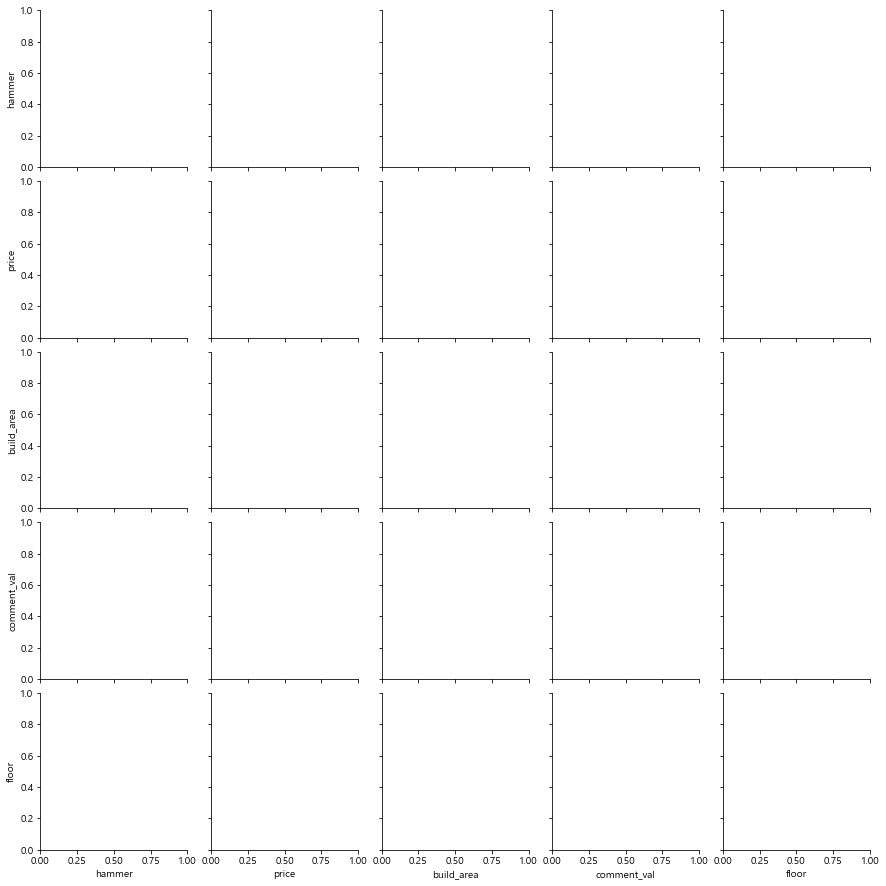

In [187]:
sns.pairplot(data, vars=['hammer','price','build_area','comment_val','floor'])

In [217]:
data_trans = pd.read_csv('../data/transaction/transaction_month.csv')
data_trans.head(20)

,load_addr,floor_cat,build_area_grade,contract_year,contract_month,price
0,서울특별시 강남구 강남대로 240,4~7층,중형,2018,7,620000000.0
1,서울특별시 강남구 강남대로 240,4~7층,중형,2019,7,720000000.0
2,서울특별시 강남구 강남대로 240,4~7층,중형,2020,12,900000000.0
3,서울특별시 강남구 강남대로 240,8~12층,소형,2021,3,370000000.0
4,서울특별시 강남구 강남대로 240,8~12층,중형,2018,2,690000000.0
5,서울특별시 강남구 강남대로 240,8~12층,중형,2018,3,675000000.0
6,서울특별시 강남구 강남대로 240,8~12층,중형,2018,9,690000000.0
7,서울특별시 강남구 강남대로 240,8~12층,중형,2019,4,700000000.0
8,서울특별시 강남구 강남대로 240,8~12층,중형,2019,5,690000000.0
9,서울특별시 강남구 강남대로 240,8~12층,중형,2019,6,700000000.0


In [218]:
data_trans['gu'] = data_trans['load_addr'].str.extract('([가-힣]+구)')
data_trans

,load_addr,floor_cat,build_area_grade,contract_year,contract_month,price,gu
0,서울특별시 강남구 강남대로 240,4~7층,중형,2018,7,620000000.0,강남구
1,서울특별시 강남구 강남대로 240,4~7층,중형,2019,7,720000000.0,강남구
2,서울특별시 강남구 강남대로 240,4~7층,중형,2020,12,900000000.0,강남구
3,서울특별시 강남구 강남대로 240,8~12층,소형,2021,3,370000000.0,강남구
4,서울특별시 강남구 강남대로 240,8~12층,중형,2018,2,690000000.0,강남구
...,...,...,...,...,...,...,...
191532,서울특별시 중랑구 중랑천로2길 48,지하~3층,중형,2019,9,290000000.0,중랑구
191533,서울특별시 중랑구 중랑천로30길 50,지하~3층,중형,2018,5,280000000.0,중랑구
191534,서울특별시 중랑구 중랑천로30길 50,지하~3층,중형,2019,11,320000000.0,중랑구
191535,서울특별시 중랑구 중랑천로30길 50,4~7층,중형,2018,3,280000000.0,중랑구


In [284]:
data_ect = data.drop_duplicates('load_addr')[['load_addr','dong','years_use']]
data_ect

,load_addr,dong,years_use
0,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,35
3,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,38
4,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,18
7,서울특별시 강남구 개포로 310,서울특별시 강남구 개포동,40
18,서울특별시 강남구 선릉로 7,서울특별시 강남구 개포동,40
...,...,...,...
279781,서울특별시 중구 동호로11바길 22,서울특별시 중구 신당동,21
279844,서울특별시 중구 마른내로 127,서울특별시 중구 오장동,1
279851,서울특별시 중구 서소문로 89-1,서울특별시 중구 정동,2
280060,서울특별시 중랑구 망우로58길 52,서울특별시 중랑구 망우동,19


In [296]:
data_ect['dong'] = data_ect['dong'].str.extract('([가-힣]+동)')
data_ect

,load_addr,dong,years_use
0,서울특별시 강남구 언주로 3,개포동,35
3,서울특별시 강남구 개포로 307,개포동,38
4,서울특별시 강남구 개포로109길 69,개포동,18
7,서울특별시 강남구 개포로 310,개포동,40
18,서울특별시 강남구 선릉로 7,개포동,40
...,...,...,...
279781,서울특별시 중구 동호로11바길 22,신당동,21
279844,서울특별시 중구 마른내로 127,오장동,1
279851,서울특별시 중구 서소문로 89-1,정동,2
280060,서울특별시 중랑구 망우로58길 52,망우동,19


In [307]:
def add_col(data_ect):
    for i in range(len(data_ect)):
        for j in data_trans['load_addr']:
            if data_ect.loc[i,'load_addr']:
                data_trans.loc[cnt,'dong'] = data_ect.loc[cnt,'dong']
                data_trans.loc[cnt,'years_use'] = data_ect.loc[cnt,'years_use']
                
            cnt += 1
add_col(data_ect)

KeyError: 6596

In [273]:
df_addr = pd.DataFrame()
df_addr

for i in list(data['load_addr'].drop_duplicates()):
    for j in range(len(data)):
        if i in data.loc[j,'load_addr']:
            df_addr['load_addr'] = data.loc[j,'load_addr']
            df_addr['dong'] = data.loc[j,'dong']
            df_addr['years_use'] = data.loc[j,'years_use']
        


KeyboardInterrupt: 

In [276]:
for i in list(data['load_addr'].drop_duplicates()):
    print(i)

서울특별시 강남구 언주로 3
서울특별시 강남구 개포로 307
서울특별시 강남구 개포로109길 69
서울특별시 강남구 개포로 310
서울특별시 강남구 선릉로 7
서울특별시 강남구 삼성로 14
서울특별시 강남구 삼성로4길 17
서울특별시 강남구 개포로 516
서울특별시 강남구 언주로 105
서울특별시 강남구 언주로 110
서울특별시 강남구 개포로28길 28
서울특별시 강남구 개포로109길 21
서울특별시 강남구 개포로109길 9
서울특별시 강남구 언주로 21
서울특별시 강남구 선릉로8길 5
서울특별시 강남구 개포로 411
서울특별시 강남구 개포로 311
서울특별시 강남구 개포로31길 9-9
서울특별시 강남구 개포로31길 9-5
서울특별시 강남구 개포로 303
서울특별시 강남구 언주로 107
서울특별시 강남구 강남대로112길 41
서울특별시 강남구 도산대로54길 48-8
서울특별시 강남구 논현로111길 39
서울특별시 강남구 학동로30길 21
서울특별시 강남구 학동로43길 38
서울특별시 강남구 학동로 338
서울특별시 강남구 봉은사로11길 11
서울특별시 강남구 언주로116길 6
서울특별시 강남구 언주로130길 30
서울특별시 강남구 학동로 165
서울특별시 강남구 강남대로146길 28
서울특별시 강남구 언주로 604
서울특별시 강남구 봉은사로29길 26
서울특별시 강남구 도산대로 232
서울특별시 강남구 도산대로30길 56
서울특별시 강남구 도산대로46길 21
서울특별시 강남구 봉은사로21길 19
서울특별시 강남구 선릉로 120
서울특별시 강남구 삼성로51길 25
서울특별시 강남구 삼성로85길 38
서울특별시 강남구 도곡로78길 22
서울특별시 강남구 선릉로 222
서울특별시 강남구 선릉로76길 12
서울특별시 강남구 삼성로64길 5
서울특별시 강남구 선릉로 206
서울특별시 강남구 도곡로93길 12
서울특별시 강남구 삼성로51길 35
서울특별시 강남구 삼성로51길 37
서울특별시 강남구 도곡로 404
서울특별시 강남구 삼성로57길 45
서울특별시 강남구 삼성로

서울특별시 서초구 효령로68길 13
서울특별시 서초구 반포대로23길 71
서울특별시 서초구 헌릉로8길 22
서울특별시 서초구 청계산로7길 43
서울특별시 서초구 청계산로9길 1-12
서울특별시 서초구 헌릉로8길 10-12
서울특별시 서초구 강남대로30길 51-3
서울특별시 서초구 남부순환로356길 105
서울특별시 서초구 논현로1길 25
서울특별시 서초구 양재천로17길 11
서울특별시 서초구 언남10길 7
서울특별시 서초구 바우뫼로 91
서울특별시 서초구 강남대로2길 96
서울특별시 서초구 바우뫼로39길 88-7
서울특별시 서초구 바우뫼로7길 51
서울특별시 서초구 바우뫼로7길 29
서울특별시 서초구 형촌길 15
서울특별시 서초구 태봉로2길 60
서울특별시 서초구 태봉로2길 65
서울특별시 서초구 태봉로2길 30
서울특별시 서초구 태봉로2길 10
서울특별시 서초구 양재대로2길 109
서울특별시 서초구 양재대로2길 90
서울특별시 서초구 바우뫼로 53
서울특별시 서초구 바우뫼로 33
서울특별시 서초구 잠원로 166-17
서울특별시 서초구 나루터로 46
서울특별시 서초구 잠원로4길 34-11
서울특별시 서초구 신반포로45길 23
서울특별시 서초구 잠원로 46-4
서울특별시 서초구 신반포로33길 15
서울특별시 서초구 반포대로 310
서울특별시 서초구 잠원로8길 35
서울특별시 서초구 잠원로14길 3
서울특별시 서초구 잠원로14길 23
서울특별시 서초구 잠원로 166-4
서울특별시 서초구 잠원로 46-38
서울특별시 서초구 강남대로99길 28
서울특별시 서초구 신반포로41길 31
서울특별시 서초구 나루터로4길 39
서울특별시 서초구 나루터로4길 61
서울특별시 서초구 잠원로14길 41
서울특별시 서초구 잠원로 157
서울특별시 서초구 잠원로8길 20
서울특별시 서초구 신반포로23길 41
서울특별시 서초구 잠원로8길 3
서울특별시 서초구 잠원로 37-48
서울특별시 서초구 잠원로 88
서울특별시 서초구 나루터로4길 28
서울특별시 서초구 신반포로33길 66
서울특별시

서울특별시 강서구 화곡로31다길 11
서울특별시 강서구 국회대로7길 157
서울특별시 강서구 강서로37길 75
서울특별시 강서구 강서로8길 11
서울특별시 강서구 강서로5나길 50
서울특별시 강서구 곰달래로20길 31-5
서울특별시 강서구 강서로5가길 42
서울특별시 강서구 월정로14길 38
서울특별시 강서구 곰달래로18길 33-13
서울특별시 강서구 까치산로 160-9
서울특별시 강서구 화곡로26길 43
서울특별시 강서구 화곡로18길 19
서울특별시 강서구 강서로41길 20
서울특별시 강서구 강서로12길 44
서울특별시 강서구 곰달래로 110
서울특별시 강서구 강서로43길 28
서울특별시 강서구 초록마을로 166
서울특별시 강서구 강서로29길 32
서울특별시 강서구 국회대로7길 175
서울특별시 강서구 가로공원로77길 21
서울특별시 강서구 초록마을로 121
서울특별시 강서구 까치산로15길 11
서울특별시 강서구 월정로20길 62-7
서울특별시 강서구 초록마을로15길 5
서울특별시 강서구 곰달래로35길 116
서울특별시 강서구 곰달래로20길 18
서울특별시 강서구 강서로33가길 86
서울특별시 강서구 월정로20길 86-8
서울특별시 강서구 강서로7길 49
서울특별시 강서구 곰달래로20길 31-19
서울특별시 강서구 까치산로12길 7-6
서울특별시 강서구 곰달래로20길 12
서울특별시 강서구 초록마을로6길 20
서울특별시 강서구 강서로 130-7
서울특별시 강서구 강서로7길 107
서울특별시 강서구 강서로7길 18
서울특별시 강서구 강서로7길 28
서울특별시 강서구 곰달래로26길 15
서울특별시 강서구 강서로7길 118
서울특별시 강서구 강서로 43-6
서울특별시 강서구 화곡로43가길 44
서울특별시 강서구 우장산로15길 47
서울특별시 강서구 국회대로 99-15
서울특별시 강서구 강서로17라길 3
서울특별시 강서구 강서로17라길 2
서울특별시 강서구 공항대로48길 12
서울특별시 강서구 강서로5라길 58
서울특별시 강서구 등촌로13자길 79
서울특별시 강서구

서울특별시 용산구 회나무로13가길 6
서울특별시 용산구 녹사평대로46길 84
서울특별시 용산구 이태원로27나길 36
서울특별시 용산구 녹사평대로 250-1
서울특별시 용산구 이태원로20길 31
서울특별시 용산구 녹사평대로 286
서울특별시 용산구 회나무로21길 7
서울특별시 용산구 장문로 27
서울특별시 용산구 녹사평대로42길 27
서울특별시 용산구 서빙고로91가길 29-7
서울특별시 용산구 삼개로 56
서울특별시 용산구 청파로47나길 45-37
서울특별시 용산구 효창원로72길 29
서울특별시 용산구 효창원로76길 7
서울특별시 용산구 한강대로62길 26
서울특별시 용산구 한강대로43길 13
서울특별시 용산구 한강대로10길 14
서울특별시 용산구 서빙고로 48
서울특별시 용산구 이촌로 1
서울특별시 용산구 대사관로7길 8
서울특별시 용산구 한남대로27길 42
서울특별시 용산구 유엔빌리지길 53
서울특별시 용산구 독서당로6길 16
서울특별시 용산구 독서당로 70
서울특별시 용산구 독서당로 39
서울특별시 용산구 대사관로 23
서울특별시 용산구 대사관로8길 9
서울특별시 용산구 우사단로10길 39-96
서울특별시 용산구 유엔빌리지길 11
서울특별시 용산구 독서당로 46
서울특별시 용산구 한남대로27길 52
서울특별시 용산구 한남대로28가길 5
서울특별시 용산구 한남대로27길 60
서울특별시 용산구 이태원로 217
서울특별시 용산구 서빙고로 413
서울특별시 용산구 서빙고로 417
서울특별시 용산구 유엔빌리지길 200-16
서울특별시 용산구 백범로45길 21-26
서울특별시 용산구 효창원로70길 34
서울특별시 용산구 효창원로72길 42
서울특별시 용산구 백범로51길 23
서울특별시 용산구 효창원로70길 19
서울특별시 용산구 백범로45길 9-10
서울특별시 용산구 임정로 9
서울특별시 용산구 효창원로66길 33
서울특별시 용산구 효창원로70길 49
서울특별시 용산구 효창원로66길 40
서울특별시 용산구 효창원로70길 26
서울특별시 용산구 효창원로93길 14
서울

서울특별시 마포구 마포대로11길 110
서울특별시 마포구 대흥로4길 54
서울특별시 마포구 성암로 133
서울특별시 마포구 희우정로1길 27
서울특별시 마포구 희우정로1길 21
서울특별시 마포구 토정로 34
서울특별시 서대문구 거북골로 84
서울특별시 서대문구 거북골로 100
서울특별시 서대문구 천중로56길 41
서울특별시 서대문구 신촌로 163
서울특별시 서대문구 응암로 134
서울특별시 서대문구 거북골로18가길 24
서울특별시 서대문구 연희로14길 62-13
서울특별시 서대문구 연희로10길 43-16
서울특별시 서대문구 연희로24길 19-13
서울특별시 서대문구 홍연길 60
서울특별시 서대문구 홍연길 77
서울특별시 서대문구 경기대로9길 15
서울특별시 서대문구 모래내로17길 79-14
서울특별시 서대문구 모래내로17길 65-16
서울특별시 서대문구 가좌로 100-21
서울특별시 서대문구 홍은중앙로3길 9
서울특별시 서대문구 모래내로24길 54
서울특별시 서대문구 모래내로24길 48
서울특별시 서대문구 통일로36가길 9
서울특별시 서초구 동광로39길 18
서울특별시 서초구 동광로 158
서울특별시 서초구 서래로2길 35
서울특별시 서초구 사평대로28길 62
서울특별시 서초구 사평대로20길 113
서울특별시 서초구 동광로45길 12
서울특별시 서초구 주흥17길 19
서울특별시 서초구 사평대로 90
서울특별시 서초구 동광로39길 40
서울특별시 서초구 신반포로15길 33
서울특별시 서초구 동광로49길 78
서울특별시 서초구 효령로 59-8
서울특별시 서초구 방배로5길 33
서울특별시 서초구 동광로24길 25
서울특별시 서초구 동광로28길 30
서울특별시 서초구 동광로 98
서울특별시 서초구 동광로30길 15
서울특별시 서초구 남부순환로 2271-11
서울특별시 서초구 동광로24길 8
서울특별시 서초구 방배로34길 89
서울특별시 서초구 서초대로33길 102
서울특별시 서초구 동광로22길 29
서울특별시 서초구 효령로21길 47
서울특별시 서초구 서초대로34가길

In [275]:
df_addr

,load_addr,dong,years_use


In [212]:
data_auction = pd.read_csv('../data/auction/auction_pjs.csv')
data_auction.head(20)

,case_year,gu,dong,dong0,bunji,floor_cat,build_area_grade,land,price,lowest,hammer,year,date_ym,low_per,ham_per,comment_val,result
0,2020,성동구,성수동1가,서울특별시 성동구 성수동1가,718,21층 이상,중형,1,3100000000,2480000000,NaN,2021,202108,80,NaN,0,0
1,2020,성동구,홍익동,서울특별시 성동구 홍익동,53,8~12층,소형,1,391000000,391000000,NaN,2021,202108,100,NaN,1,0
2,2019,서대문구,연희동,서울특별시 서대문구 연희동,194-30,지하~3층,소형,1,195000000,10720000,NaN,2021,202108,5,NaN,1,0
3,2019,서대문구,연희동,서울특별시 서대문구 연희동,194-30,지하~3층,소형,1,190000000,13058000,NaN,2021,202108,7,NaN,1,0
4,2020,서대문구,홍제동,서울특별시 서대문구 홍제동,470,4~7층,중형,0,478000000,478000000,NaN,2021,202108,100,NaN,1,0
5,2020,은평구,구산동,서울특별시 은평구 구산동,224,지하~3층,중형,1,415000000,415000000,NaN,2021,202108,100,NaN,1,0
6,2020,용산구,원효로4가,서울특별시 용산구 원효로4가,110-1,지하~3층,중형,0,806000000,806000000,NaN,2021,202108,100,NaN,1,0
7,2020,마포구,아현동,서울특별시 마포구 아현동,732,4~7층,중형,1,964000000,964000000,NaN,2021,202108,100,NaN,1,0
8,2020,마포구,상암동,서울특별시 마포구 상암동,1743,13~20층,소형,1,566000000,566000000,NaN,2021,202108,100,NaN,1,0
9,2020,관악구,신림동,서울특별시 관악구 신림동,1563-82,4~7층,중형,1,523000000,523000000,NaN,2021,202108,100,NaN,0,0


In [4]:
data_auction_api = pd.read_csv('../data/auction/api_from_auction.csv')
data_auction_api

,Unnamed: 0,case_year,gu,dong,dong0,bunji,floor_cat,build_area_grade,land,price,...,year,date_ym,low_per,ham_per,comment_val,result,dong1,"('brand_name', 0)","('addr_lat', 0)","('addr_lng', 0)"
0,0,2020,성동구,성수동1가,서울특별시 성동구 성수동1가,718,21층 이상,중형,1,3100000000,...,2021,202108,80,NaN,0,0,서울특별시 성동구 성수동1가 718,래미안라센트아파트,37.599481,127.03883
1,1,2020,성동구,홍익동,서울특별시 성동구 홍익동,53,8~12층,소형,1,391000000,...,2021,202108,100,NaN,1,0,서울특별시 성동구 홍익동 53,래미안라센트아파트,37.599481,127.03883
2,2,2019,서대문구,연희동,서울특별시 서대문구 연희동,194-30,지하~3층,소형,1,195000000,...,2021,202108,5,NaN,1,0,서울특별시 서대문구 연희동 194-30,래미안라센트아파트,37.599481,127.03883
3,3,2019,서대문구,연희동,서울특별시 서대문구 연희동,194-30,지하~3층,소형,1,190000000,...,2021,202108,7,NaN,1,0,서울특별시 서대문구 연희동 194-30,래미안라센트아파트,37.599481,127.03883
4,4,2020,서대문구,홍제동,서울특별시 서대문구 홍제동,470,4~7층,중형,0,478000000,...,2021,202108,100,NaN,1,0,서울특별시 서대문구 홍제동 470,래미안라센트아파트,37.599481,127.03883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,2018,동작구,상도동,서울특별시 동작구 상도동,533,지하~3층,대형,1,938000000,...,2018,201806,100,112.386269,0,1,서울특별시 동작구 상도동 533,래미안라센트아파트,37.599481,127.03883
1091,1091,2018,금천구,독산동,서울특별시 금천구 독산동,0,4~7층,소형,1,254000000,...,2018,201806,100,100.043307,0,1,서울특별시 금천구 독산동 0,래미안라센트아파트,37.599481,127.03883
1092,1092,2018,성북구,삼선동2가,서울특별시 성북구 삼선동2가,420,4~7층,중형,1,507000000,...,2018,201806,100,105.522682,0,1,서울특별시 성북구 삼선동2가 420,래미안라센트아파트,37.599481,127.03883
1093,1093,2018,중랑구,면목동,서울특별시 중랑구 면목동,581,13~20층,대형,1,481000000,...,2018,201805,100,101.663202,0,1,서울특별시 중랑구 면목동 581,래미안라센트아파트,37.599481,127.03883
